In [ ]:
# -------------------------------------------------- #
# Author: Jiayu Yang
# Date: 15 May 2023
# File Name: [Project CD] 1D FVM Central & Upwind & Hybrid Difference Scheme
# File Description: 
#    This file aims at solving the 1D steady convection-diffusion problems using the
#    Finite Volume Method (FVM) with respectively:
#        - Central Difference Scheme
#        - Upwind Difference Scheme
#        - Hybrid Difference Scheme
#    The comparison of stability is also included.
# Web Link to Github: https://github.com/LakeYang0818/Solving-Convection-Diffusion-Problems
# -------------------------------------------------- #

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import mpmath

In [4]:
def exact_solver(a, mu, s, u0, uN, N):
    xmesh = np.zeros(N)  # Mesh size (Delta_x)
    xmesh = list(i / N for i in range(N + 1)) # Mesh point
    
    u_exact = np.zeros(N + 1)
    for i in range(N + 1):
        u_exact[i] = - s / (a * (np.exp(a / mu) - 1)) * (np.exp(a * xmesh[i] / mu) - 1) + s * xmesh[i] / a
    return u_exact

def FVM_Central(a, mu, s, u0, uN, N):
    
    # FVM Matrix A
    A = np.zeros((N + 1, N + 1))
    # Source S
    S = np.ones(N + 1) * s / N

    left  = a / 2 + mu * N
    right = - a / 2 + mu * N
    mid   = left + right

    for i in range(N + 1):
        if i == 0:
            A[i,   i  ] = mid
            A[i, i + 1] = - right
        elif i == N:
            A[i, i - 1] = - left
            A[i,   i  ] = mid
        else:
            A[i, i - 1] = - left
            A[i,   i  ] = mid
            A[i, i + 1] = - right
            
    A = A[1:-1, 1:-1]
    S = S[1:-1]
       
    u_sol = np.zeros(N + 1)
    u_sol[1:-1] = np.linalg.solve(A, S)
    u_sol[0]  = u0
    u_sol[-1] = uN
    return u_sol

def FVM_Upwind(a, mu, s, u0, uN, N):
    
    # FVM Matrix A
    A = np.zeros((N + 1, N + 1))
    # Source S
    S = np.ones(N + 1) * s / N

    left  = mu * N + max(+ a, 0)
    right = mu * N + max(- a, 0)
    mid   = left + right
    
    for i in range(N + 1):
        if i == 0:
            A[i,   i  ] = mid
            A[i, i + 1] = - right
        elif i == N:
            A[i, i - 1] = - left
            A[i,   i  ] = mid
        else:
            A[i, i - 1] = - left
            A[i,   i  ] = mid
            A[i, i + 1] = - right
            
    A = A[1:-1, 1:-1]
    S = S[1:-1]
       
    u_sol = np.zeros(N + 1)
    u_sol[1:-1] = np.linalg.solve(A, S)
    u_sol[0]  = u0
    u_sol[-1] = uN

    return u_sol

def FVM_Hybrid(a, mu, s, u0, uN, N):
    
    # FVM Matrix A
    A = np.zeros((N + 1, N + 1))
    # Source S
    S = np.ones(N + 1) * s / N

    left  = max((mu * N + a / 2), + a, 0)
    right = max((mu * N - a / 2), - a, 0)
    mid   = left + right
    
    for i in range(N + 1):
        if i == 0:
            A[i,   i  ] = mid
            A[i, i + 1] = - right
        elif i == N:
            A[i, i - 1] = - left
            A[i,   i  ] = mid
        else:
            A[i, i - 1] = - left
            A[i,   i  ] = mid
            A[i, i + 1] = - right
            
    A = A[1:-1, 1:-1]
    S = S[1:-1]
    
    u_sol = np.zeros(N + 1)
    u_sol[1:-1] = np.linalg.solve(A, S)
    u_sol[0]  = u0
    u_sol[-1] = uN
    return u_sol

In [5]:
def simple_plot(method, a, mu, s, u0, uN, N, save):
    # X-axis
    xmesh = np.zeros(N)  # Mesh point
    xmesh = list(i / N for i in range(len(xmesh) + 1))
    
    # Peclet number
    Pe = a / (2 * mu * N)
    
    # Exact Solution
    u_exact = exact_solver(a, mu, s, u0, uN, N)
    
    # Numerical Solution
    if method == 'FVM Central Scheme':
        u_numerical = FVM_Central(a, mu, s, u0, uN, N)
    elif method == 'FVM Upwind Scheme':
        u_numerical = FVM_Upwind(a, mu, s, u0, uN, N)
    elif method == 'FVM Hybrid Scheme':
        u_numerical = FVM_Hybrid(a, mu, s, u0, uN, N)
    
    plt.plot(xmesh, u_numerical, color = 'red',  marker = 'o',label = method)
    plt.plot(xmesh, u_exact, color = 'blue', linestyle='--', marker = 'o', label = 'Exact')
    plt.title('%s v/s Exact Solution \n at $N = %s, P_e = %s$'%(method, N, Pe))
    plt.xlabel('x')
    plt.ylabel('u(x)')
    plt.legend()
    if save == True:
        plt.savefig('/Users/pc/Desktop/[P2] Convection-Diffusion Problem/Images Pool/%s_Pe = %s_N = %s_Plot.png'%(method, Pe, N))
    plt.show()
    

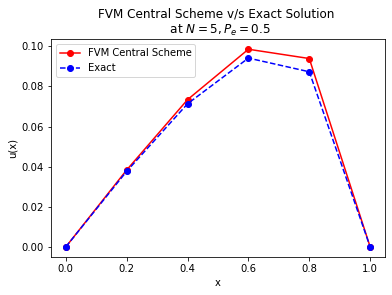

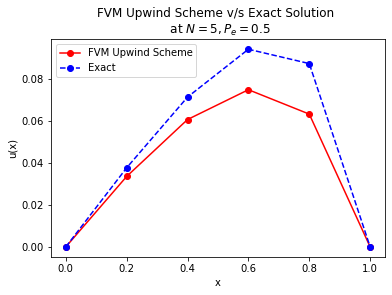

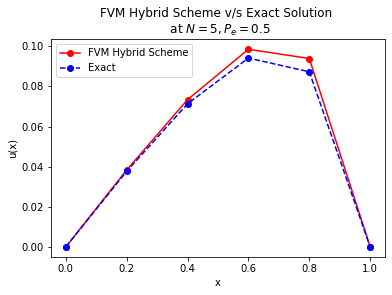

In [6]:
# Setup
a = 5
mu = 1
s = 1
u0 = 0
uN = 0
N = 5

# Simple Plot

simple_plot('FVM Central Scheme', a, mu, s, u0, uN, N, False)
simple_plot('FVM Upwind Scheme',  a, mu, s, u0, uN, N, False)
simple_plot('FVM Hybrid Scheme',  a, mu, s, u0, uN, N, False)

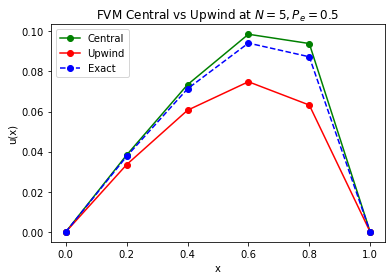

In [7]:
# Setup
a = 5
mu = 1
s = 1
u0 = 0
uN = 0
N = 5

# X-axis
xmesh = np.zeros(N)  # Mesh point
xmesh = list(i / N for i in range(len(xmesh) + 1))

# Peclet number
Pe = a / (2 * mu * N)

# Exact Solution
u_exact = exact_solver(a, mu, s, u0, uN, N)

# Numerical Solution
u_cen = FVM_Central(a, mu, s, u0, uN, N)
u_upw = FVM_Upwind(a, mu, s, u0, uN, N)

plt.plot(xmesh, u_cen, color = 'green',  marker = 'o', label = 'Central')
plt.plot(xmesh, u_upw, color = 'red',  marker = 'o', label = 'Upwind')
plt.plot(xmesh, u_exact, color = 'blue', linestyle='--', marker = 'o', label = 'Exact')
plt.title('FVM Central vs Upwind at $N = %s, P_e = %s$'%(N, Pe))
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
# plt.savefig('/Users/pc/Desktop/[P2] Convection-Diffusion Problem/Images Pool/Comparison of FVM Central and Upwind at Pe = %s_N = %s_Plot.png'%(Pe, N))
plt.show()

In [8]:
# -----------------FVM Central Different Pe------------------#
def different_Pe_Plot(method, mu, s, u0, uN, N, save):
    # X-axis
    xmesh = np.zeros(N)  # Mesh point
    xmesh = list(i / N for i in range(len(xmesh) + 1))
    
    Pe_choice = [0.25, 0.5, 1, 5]
    
    if method == 'FVM Central Scheme':
        for Pe in Pe_choice[:-1]:
            a = 2 * N * mu * Pe
            u_exact = exact_solver(a, mu, s, u0, uN, N)
            u_numer = FVM_Central(a, mu, s, u0, uN, N)
            plt.plot(xmesh, u_numer, color = 'red', marker = 'o')
            plt.plot(xmesh, u_exact, color = 'blue', linestyle='--', marker = 'o')
            plt.text(xmesh[2], u_exact[-8], 'Pe = %s'%Pe, bbox=dict(facecolor='white', alpha=0.8))
            
        Pe = Pe_choice[-1]
        a = 2 * N * mu * Pe
        u_numer = FVM_Central(a, mu, s, u0, uN, N)
        u_exact = exact_solver(a, mu, s, u0, uN, N)
        plt.plot(xmesh, u_numer, color = 'red', label = method, marker = 'o')
        plt.plot(xmesh, u_exact, color = 'blue', linestyle='--', marker = 'o', label = 'Exact')
        plt.text(xmesh[2], u_exact[-5], 'Pe = %s'%Pe, bbox=dict(facecolor='white', alpha=0.8))
    
    elif method == 'FVM Upwind Scheme':
        for Pe in Pe_choice[:-1]:
            a = 2 * N * mu * Pe
            u_exact = exact_solver(a, mu, s, u0, uN, N)
            u_numer = FVM_Upwind(a, mu, s, u0, uN, N)
            plt.plot(xmesh, u_numer, color = 'red', marker = 'o')
            plt.plot(xmesh, u_exact, color = 'blue', linestyle='--', marker = 'o')
            plt.text(xmesh[2], u_exact[-8], 'Pe = %s'%Pe, bbox=dict(facecolor='white', alpha=0.8))
            
        Pe = Pe_choice[-1]
        a = 2 * N * mu * Pe
        u_numer = FVM_Upwind(a, mu, s, u0, uN, N)
        u_exact = exact_solver(a, mu, s, u0, uN, N)
        plt.plot(xmesh, u_numer, color = 'red', label = method, marker = 'o')
        plt.plot(xmesh, u_exact, color = 'blue', linestyle='--', marker = 'o', label = 'Exact')
        plt.text(xmesh[2], u_exact[-5], 'Pe = %s'%Pe, bbox=dict(facecolor='white', alpha=0.8))
    
    elif method == 'FVM Hybrid Scheme':
        for Pe in Pe_choice[:-1]:
            a = 2 * N * mu * Pe
            u_exact = exact_solver(a, mu, s, u0, uN, N)
            u_numer = FVM_Hybrid(a, mu, s, u0, uN, N)
            plt.plot(xmesh, u_numer, color = 'red', marker = 'o')
            plt.plot(xmesh, u_exact, color = 'blue', linestyle='--', marker = 'o')
            plt.text(xmesh[2], u_exact[-7], 'Pe = %s'%Pe, bbox=dict(facecolor='white', alpha=0.8))
            
        Pe = Pe_choice[-1]
        a = 2 * N * mu * Pe
        u_numer = FVM_Hybrid(a, mu, s, u0, uN, N)
        u_exact = exact_solver(a, mu, s, u0, uN, N)
        plt.plot(xmesh, u_numer, color = 'red', label = method, marker = 'o')
        plt.plot(xmesh, u_exact, color = 'blue', linestyle='--', marker = 'o', label = 'Exact')
        plt.text(xmesh[2], u_exact[-5], 'Pe = %s'%Pe, bbox=dict(facecolor='white', alpha=0.8))

    plt.title('%s v/s Exact Solution\nDifferent Peclet Number under N = %s'%(method, N))
    plt.xlabel('x')
    plt.ylabel('u(x)')
    plt.legend()
    if save == True:
        plt.savefig('/Users/shapixiaokeai/Desktop/[P2] Convection-Diffusion Problem/Images Pool/%s_N = %s under different Pe.png'%(method, N))
    plt.show()
    

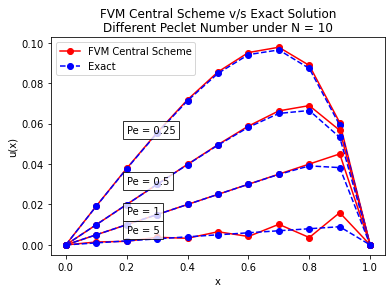

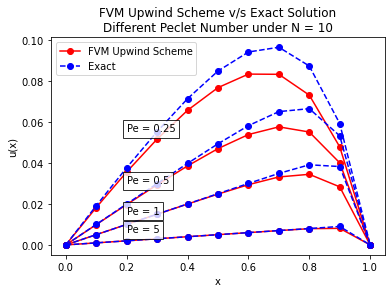

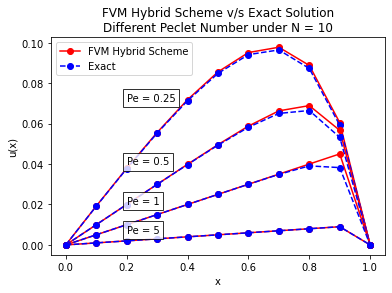

In [9]:
# Different Pe Plot

# Setup
mu = 1
s = 1
u0 = 0
uN = 0
N = 10

different_Pe_Plot('FVM Central Scheme', mu, s, u0, uN, N, False)
different_Pe_Plot('FVM Upwind Scheme',  mu, s, u0, uN, N, False)
different_Pe_Plot('FVM Hybrid Scheme',  mu, s, u0, uN, N, False)

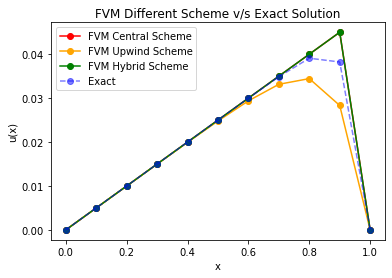

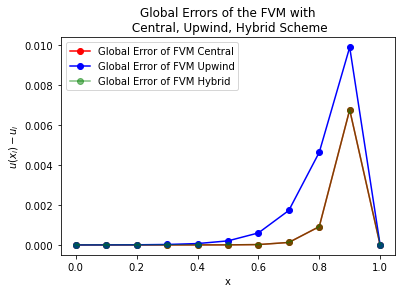

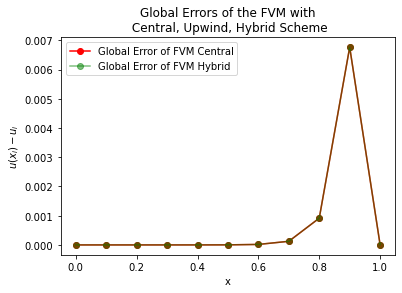

In [10]:
# -----------------Comparison of different schemes------------------#

# Setup
a = 20
mu = 1
s = 1
u0 = 0
uN = 0
N = 10
Pe = a / (2 * N * mu)

# X-Axis
xmesh = np.zeros(N)  # Mesh point
xmesh = list(i / N for i in range(len(xmesh) + 1))

u_cen = FVM_Central(a, mu, s, u0, uN, N)
u_upw = FVM_Upwind(a, mu, s, u0, uN, N)
u_hyb = FVM_Hybrid(a, mu, s, u0, uN, N)
u_exact = exact_solver(a, mu, s, u0, uN, N)

plt.plot(xmesh, u_cen, 'red',   marker = 'o', label = 'FVM Central Scheme')
plt.plot(xmesh, u_upw, 'orange',  marker = 'o', label = 'FVM Upwind Scheme')
plt.plot(xmesh, u_hyb, 'green', marker = 'o', label = 'FVM Hybrid Scheme')

plt.plot(xmesh, u_exact, 'blue', linestyle='--', marker = 'o', label = 'Exact', alpha = 0.5)
plt.title('FVM Different Scheme v/s Exact Solution')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
#plt.savefig('/Users/pc/Desktop/[P2] Convection-Diffusion Problem/Images Pool/Comparison of FVM Central, Upwind, Hybrid Difference Scheme at Pe = %s N = %s.png'%(Pe, N))
plt.show()

# Errors Plot
err_cen = abs(u_cen - u_exact)
err_upw = abs(u_upw - u_exact)
err_hyb = abs(u_hyb - u_exact)

plt.plot(xmesh, err_cen, 'r-', marker = 'o', label = 'Global Error of FVM Central')
plt.plot(xmesh, err_upw, 'b-', marker = 'o', label = 'Global Error of FVM Upwind')
plt.plot(xmesh, err_hyb, 'g-', marker = 'o', label = 'Global Error of FVM Hybrid', alpha = 0.5)

plt.title('Global Errors of the FVM with\n Central, Upwind, Hybrid Scheme')
plt.xlabel('x')
plt.ylabel('$u(x_i) - u_i$')
plt.legend()
plt.show()

plt.plot(xmesh, err_cen, 'r-', marker = 'o', label = 'Global Error of FVM Central')
plt.plot(xmesh, err_hyb, 'g-', marker = 'o', label = 'Global Error of FVM Hybrid', alpha = 0.5)

plt.title('Global Errors of the FVM with\n Central, Upwind, Hybrid Scheme')
plt.xlabel('x')
plt.ylabel('$u(x_i) - u_i$')
plt.legend()
plt.show()

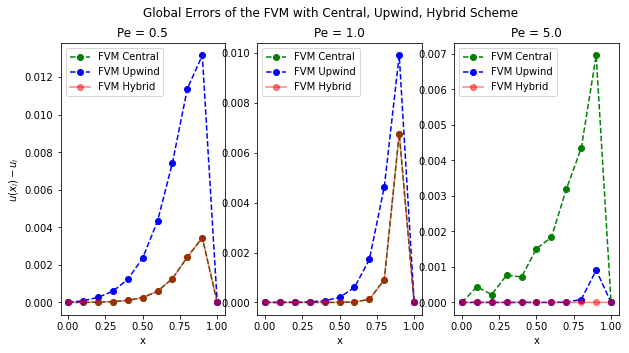

In [11]:
# Errors Plot

# Setup
mu = 1
s = 1
u0 = 0
uN = 0
N = 10

# X-Axis
xmesh = np.zeros(N)  # Mesh point
xmesh = list(i / N for i in range(len(xmesh) + 1))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))
fig.suptitle('Global Errors of the FVM with Central, Upwind, Hybrid Scheme')

# First Plot
a = 10
Pe = a / (2 * N * mu)
u_cen = FVM_Central(a, mu, s, u0, uN, N)
u_upw = FVM_Upwind(a, mu, s, u0, uN, N)
u_hyb = FVM_Hybrid(a, mu, s, u0, uN, N)
u_exact = exact_solver(a, mu, s, u0, uN, N)
err_cen = abs(u_cen - u_exact)
err_upw = abs(u_upw - u_exact)
err_hyb = abs(u_hyb - u_exact)

ax1.plot(xmesh, err_cen, 'g', linestyle = '--', marker = 'o', label = 'FVM Central')
ax1.plot(xmesh, err_upw, 'b', linestyle = '--', marker = 'o', label = 'FVM Upwind')
ax1.plot(xmesh, err_hyb, 'r', marker = 'o', alpha = 0.5, label = 'FVM Hybrid')
ax1.set_title('Pe = %s'%Pe)
ax1.set_xlabel('x')
ax1.set_ylabel('$u(x_i) - u_i$')
ax1.legend()

# Second Plot
a = 20
Pe = a / (2 * N * mu)
u_cen = FVM_Central(a, mu, s, u0, uN, N)
u_upw = FVM_Upwind(a, mu, s, u0, uN, N)
u_hyb = FVM_Hybrid(a, mu, s, u0, uN, N)
u_exact = exact_solver(a, mu, s, u0, uN, N)
err_cen = abs(u_cen - u_exact)
err_upw = abs(u_upw - u_exact)
err_hyb = abs(u_hyb - u_exact)

ax2.plot(xmesh, err_cen, 'g', linestyle = '--', marker = 'o', label = 'FVM Central')
ax2.plot(xmesh, err_upw, 'b', linestyle = '--', marker = 'o', label = 'FVM Upwind')
ax2.plot(xmesh, err_hyb, 'r', marker = 'o', alpha = 0.5, label = 'FVM Hybrid')
ax2.set_title('Pe = %s'%Pe)
ax2.set_xlabel('x')
ax2.legend()

# Third Plot
a = 100
Pe = a / (2 * N * mu)
u_cen = FVM_Central(a, mu, s, u0, uN, N)
u_upw = FVM_Upwind(a, mu, s, u0, uN, N)
u_hyb = FVM_Hybrid(a, mu, s, u0, uN, N)
u_exact = exact_solver(a, mu, s, u0, uN, N)
err_cen = abs(u_cen - u_exact)
err_upw = abs(u_upw - u_exact)
err_hyb = abs(u_hyb - u_exact)

ax3.plot(xmesh, err_cen, 'g', linestyle = '--', marker = 'o', label = 'FVM Central')
ax3.plot(xmesh, err_upw, 'b', linestyle = '--', marker = 'o', label = 'FVM Upwind')
ax3.plot(xmesh, err_hyb, 'r', marker = 'o', alpha = 0.5, label = 'FVM Hybrid')
ax3.set_title('Pe = %s'%Pe)
ax3.set_xlabel('x')
ax3.legend()

#plt.savefig('/Users/pc/Desktop/[P2] Convection-Diffusion Problem/Images Pool/Global Errors of FVM Central, Upwind and Hybrid Difference Scheme.png')
plt.show()

In [12]:
# -----------------FDM Central Different Pe------------------#
def different_Pe_different_methods_Plot(mu, s, u0, uN, N, save):
    xmesh = np.zeros(N)  # Mesh point
    xmesh = list(i / N for i in range(len(xmesh) + 1))   
    Pe_choice = [0.25, 0.5, 1, 5, 10, 50]
    
    
    plt.figure(figsize = (10, 5))
    for Pe in Pe_choice[:-1]:
        a = 2 * N * mu * Pe
        u_exact = exact_solver(a, mu, s, u0, uN, N)
        u_cen = FVM_Central(a, mu, s, u0, uN, N)
        u_upw = FVM_Upwind(a, mu, s, u0, uN, N)
        u_hyb = FVM_Hybrid(a, mu, s, u0, uN, N)

        plt.plot(xmesh, u_exact, color = 'blue', marker = 'o', linestyle='--')
        plt.plot(xmesh, u_cen, color = 'red', linestyle='-')
        plt.plot(xmesh, u_upw, color = 'green', linestyle='-')
        plt.plot(xmesh, u_hyb, color = 'orange', linestyle='-')
        
        if Pe == 5:
            plt.text(xmesh[5], u_cen[-5], 'Pe = %s'%Pe, bbox=dict(facecolor='white', alpha=0.8))
        elif Pe == 10:
            plt.text(xmesh[4], u_cen[-5], 'Pe = %s'%Pe, bbox=dict(facecolor='white', alpha=0.8))
        else:
            plt.text(xmesh[5], u_cen[-6], 'Pe = %s'%Pe, bbox=dict(facecolor='white', alpha=0.8))       

    Pe = Pe_choice[-1]
    a = 2 * N * mu * Pe
    u_exact = exact_solver(a, mu, s, u0, uN, N)
    u_cen = FVM_Central(a, mu, s, u0, uN, N)
    u_upw = FVM_Upwind(a, mu, s, u0, uN, N)
    u_hyb = FVM_Hybrid(a, mu, s, u0, uN, N)
    
    plt.plot(xmesh, u_exact, color = 'blue', marker = 'o', linestyle='--', label = 'Exact')
    plt.plot(xmesh, u_cen, color = 'red',    linestyle='-', label = 'FVM Central')
    plt.plot(xmesh, u_upw, color = 'green',  linestyle='-', label = 'FVM Upwind')
    plt.plot(xmesh, u_hyb, color = 'orange', linestyle='-', label = 'FVM Hybrid')
        
    plt.text(xmesh[3], u_exact[-10], 'Pe = %s'%Pe, bbox=dict(facecolor='white', alpha=0.8))
    
    plt.title('FVM Schemes Under Different Peclet Number at N = %s'%N)
    plt.xlabel('x')
    plt.ylabel('u(x)')
    plt.legend()
    if save == True:
        plt.savefig('/Users/pc/Desktop/[P2] Convection-Diffusion Problem/Images Pool/Differnt FVM Schemes under different Pe at N = %s.png'%N)
    plt.show()
    

/var/folders/kw/h_nrm_y92yn6h074z_crl2000000gn/T/ipykernel_5944/1085253531.py:7: RuntimeWarning: overflow encountered in exp
  u_exact[i] = - s / (a * (np.exp(a / mu) - 1)) * (np.exp(a * xmesh[i] / mu) - 1) + s * xmesh[i] / a
/var/folders/kw/h_nrm_y92yn6h074z_crl2000000gn/T/ipykernel_5944/1085253531.py:7: RuntimeWarning: invalid value encountered in double_scalars
  u_exact[i] = - s / (a * (np.exp(a / mu) - 1)) * (np.exp(a * xmesh[i] / mu) - 1) + s * xmesh[i] / a


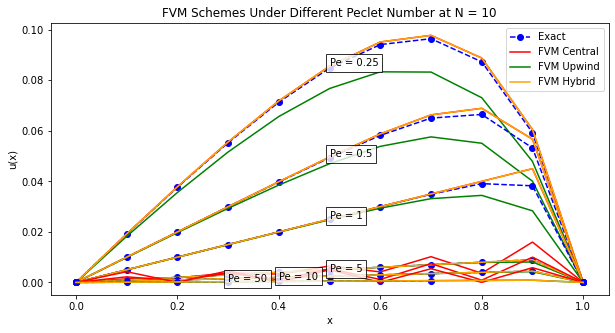

In [13]:
# Different Pe and Different Methods Plot

# Setup
mu = 1
s = 1
u0 = 0
uN = 0
N = 10

different_Pe_different_methods_Plot(mu, s, u0, uN, N, False)

In [12]:
# -----------------FVM Central Different Pe------------------#
def different_Pe_different_Central_Plot(mu, s, u0, uN, N, save):
    xmesh = np.zeros(N)  # Mesh point
    xmesh = list(i / N for i in range(len(xmesh) + 1))   
    Pe_choice = [0.1, 0.5, 1, 5, 10, 20]
    
    
    plt.figure(figsize = (10, 5))
    for Pe in Pe_choice:
        a = 2 * N * mu * Pe
        u_exact = exact_solver(a, mu, s, u0, uN, N)
        u_cen = FVM_Central(a, mu, s, u0, uN, N)
        err_cen = abs(u_cen - u_exact)
        plt.plot(xmesh, err_cen, linestyle = '--', marker = 'o', label = 'Pe = %s'%Pe)
    
    plt.title('FVM Central Scheme Under Different Peclet Number at N = %s'%N)
    plt.xlabel('x')
    plt.ylabel('u(x)')
    plt.legend()
    if save == True:
        plt.savefig('/Users/pc/Desktop/[P2] Convection-Diffusion Problem/Images Pool/FVM Central Schemes under different Pe at N = %s.png'%N)
    plt.show()
    

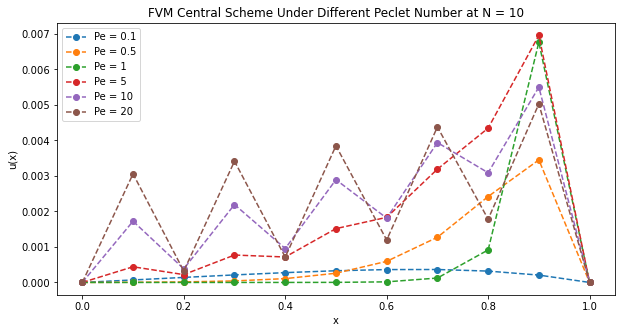

In [13]:
# Different Pe and Different Methods Plot

# Setup
mu = 1
s = 1
u0 = 0
uN = 0
N = 10

different_Pe_different_Central_Plot(mu, s, u0, uN, N, False)

In [14]:
# -----------------FVM Upwind Different Pe------------------#
def different_Pe_different_Upwind_Plot(mu, s, u0, uN, N, save):
    xmesh = np.zeros(N)  # Mesh point
    xmesh = list(i / N for i in range(len(xmesh) + 1))   
    Pe_choice = [0.1, 0.5, 1, 5, 10, 20]

    plt.figure(figsize = (10, 5))
    for Pe in Pe_choice:
        a = 2 * N * mu * Pe
        u_exact = exact_solver(a, mu, s, u0, uN, N)
        u_upw = FVM_Upwind(a, mu, s, u0, uN, N)
        err_cen = abs(u_upw - u_exact)
        plt.plot(xmesh, err_cen, linestyle = '--', marker = 'o', label = 'Pe = %s'%Pe)

    plt.title('FVM Upwind Scheme Under Different Peclet Number at N = %s'%N)
    plt.xlabel('x')
    plt.ylabel('u(x)')
    plt.legend()
    if save == True:
        plt.savefig('/Users/pc/Desktop/[P2] Convection-Diffusion Problem/Images Pool/FVM Upwind Schemes under different Pe at N = %s.png'%N)
    plt.show()
    

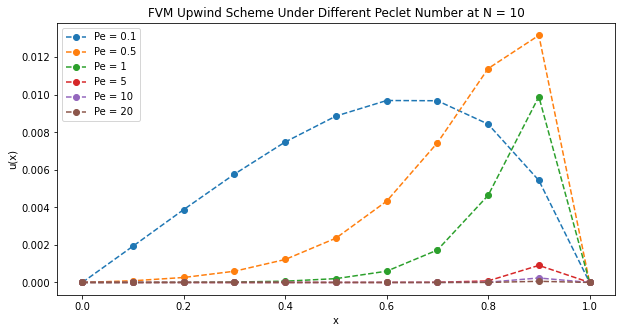

In [15]:
# Different Pe and Different Methods Plot

# Setup
mu = 1
s = 1
u0 = 0
uN = 0
N = 10

different_Pe_different_Upwind_Plot(mu, s, u0, uN, N, False)

In [16]:
# -----------------FVM Upwind Different Pe------------------#
def different_Pe_different_Hybrid_Plot(mu, s, u0, uN, N, save):
    xmesh = np.zeros(N)  # Mesh point
    xmesh = list(i / N for i in range(len(xmesh) + 1))   
    Pe_choice = [0.1, 0.5, 1, 5, 10, 20]

    plt.figure(figsize = (10, 5))
    for Pe in Pe_choice:
        a = 2 * N * mu * Pe
        u_exact = exact_solver(a, mu, s, u0, uN, N)
        u_hyb   = FVM_Hybrid(a, mu, s, u0, uN, N)
        err_hyb = abs(u_hyb - u_exact)
        plt.plot(xmesh, err_hyb, linestyle = '--', marker = 'o', label = 'Pe = %s'%Pe)

    plt.title('FVM Hybrid Scheme Under Different Peclet Number at N = %s'%N)
    plt.xlabel('x')
    plt.ylabel('u(x)')
    plt.legend()
    if save == True:
        plt.savefig('/Users/pc/Desktop/[P2] Convection-Diffusion Problem/Images Pool/FVM Hybrid Schemes under different Pe at N = %s.png'%N)
    plt.show()
    

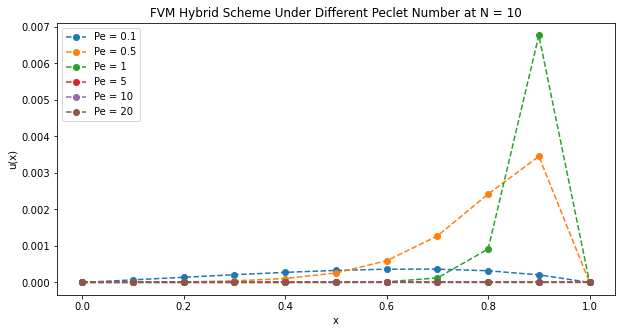

In [17]:
# Different Pe and Different Methods Plot

# Setup
mu = 1
s = 1
u0 = 0
uN = 0
N = 10

different_Pe_different_Hybrid_Plot(mu, s, u0, uN, N, False)